# Topic Modeling w/ TF-IDF Vectorization

The purpose of this notebook is to utilize TF-IDF vectorization in topic modeling, using the new_df dataframe built in final_dataframe_cleanup.ipynb.

Importing packages:

In [293]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10

Picking in Data:

In [294]:
with open('Data/cleaned_string_df.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [295]:
new_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,one minute response sir


# TF-IDF Vectorizer

For the next round of topic modeling, I will be using TF-IDF vectorizer, to compare the results.

In [486]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [538]:
stop = ['republican','america','applause', 'cheers','presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute', 'think', 'would', 'sure', 'get', 'say', 'year']

In [539]:
vectorizer = TfidfVectorizer(stop_words=stop)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling at 25 words.  This will also make sure to capture topics the candidates are covering in detail.

In [554]:
X = new_df[new_df.line_length >= 25]['string']
tfi_model = vectorizer.fit_transform(X)

In [555]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [556]:
tf_term_document_matrix.shape

(15690, 17557)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

After some trial and error, utilizing 8 topics for topic modeling:

In [557]:
nmf_model = NMF(8, init='nndsvda')

Topics from the relating model, for each line:

In [558]:
tf_doc_topic = nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

(15690, 8)

Pulling the top 20 words for each of the 8 topics:

In [559]:
tf_words = vectorizer.get_feature_names()
tf = nmf_model.components_.argsort(axis=1)[:,-1:-20:-1]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['people', 'know', 'one', 'right', 'time', 'thing', 'issue', 'well', 'like', 'life', 'let', 'believe', 'law', 'come', 'first', 'lot', 'way', 'look', 'got']


Topic 2:
['tax', 'cut', 'percent', 'income', 'pay', 'plan', 'rate', 'middle', 'code', 'increase', 'class', 'raise', 'spending', 'billion', 'budget', 'money', 'family', 'capital', 'fair']


Topic 3:
['health', 'care', 'insurance', 'plan', 'cost', 'medicare', 'company', 'system', 'universal', 'people', 'affordable', 'coverage', 'drug', 'million', 'doctor', 'american', 'private', 'every', 'child']


Topic 4:
['school', 'child', 'education', 'need', 'teacher', 'kid', 'parent', 'college', 'public', 'family', 'student', 'make', 'every', 'money', 'program', 'choice', 'go', 'help', 'federal']


Topic 5:
['going', 'make', 'go', 'know', 'back', 'change', 'able', 'pay', 'take', 'economy', 'money', 'way', 'see', 'talk', 'got', 'bring', 'look', 'keep', 'people']


Topic 6:
['security', 'social', 'medicare', 'money', 'program', 'benefi

In [560]:
tf.shape

(8, 19)

Based on this, the 8 topics seem to be about the following: 
1. Campaign Issues
2. Taxes
3. Healthcare
4. Education
5. Debate Speak (Catch-All)
6. Social Security
7. Foreign Policy / War
8. Domestic Economy

### Word Cloud Visualization:

Here, I'll be creating some word cloud visualizations for these topic and the key words associated with them.

w/ help from this tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python

In [564]:
from PIL import Image

In [565]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [566]:
full_text = ' '.join(X)

Creating a list of words from each topic's key words:

In [567]:
campaign_issues_topic = ' '.join(tf_topic_words[0])
taxes_topic = ' '.join(tf_topic_words[1])
healthcare_topic = ' '.join(tf_topic_words[2])
education_topic = ' '.join(tf_topic_words[3])
debate_speak_topic = ' '.join(tf_topic_words[4])
social_security_topic = ' '.join(tf_topic_words[5])
foreign_policy_topic = ' '.join(tf_topic_words[6])
economy_topic = ' '.join(tf_topic_words[7])

Topic 1:

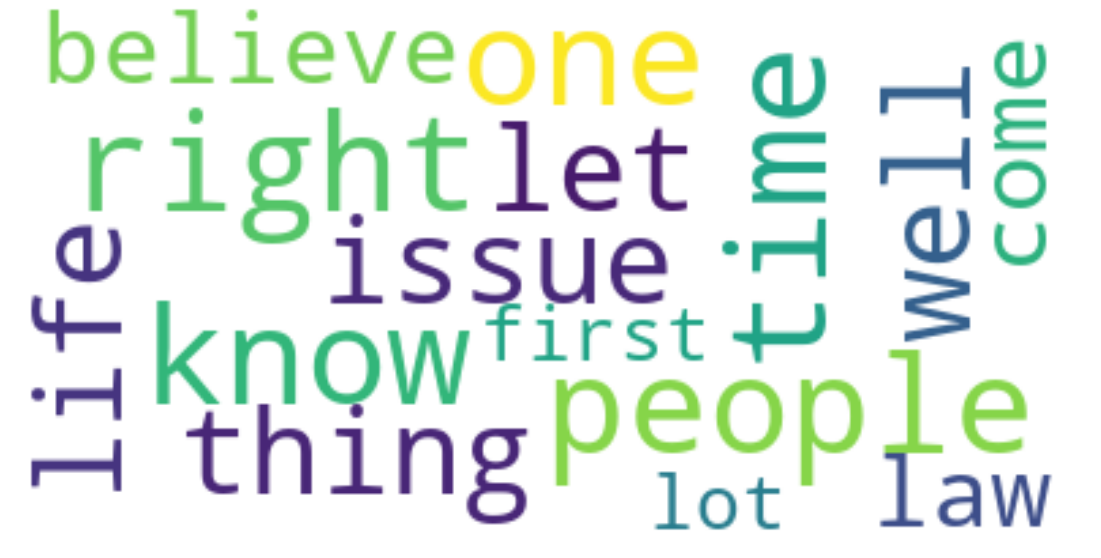

In [574]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(campaign_issues_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 2:

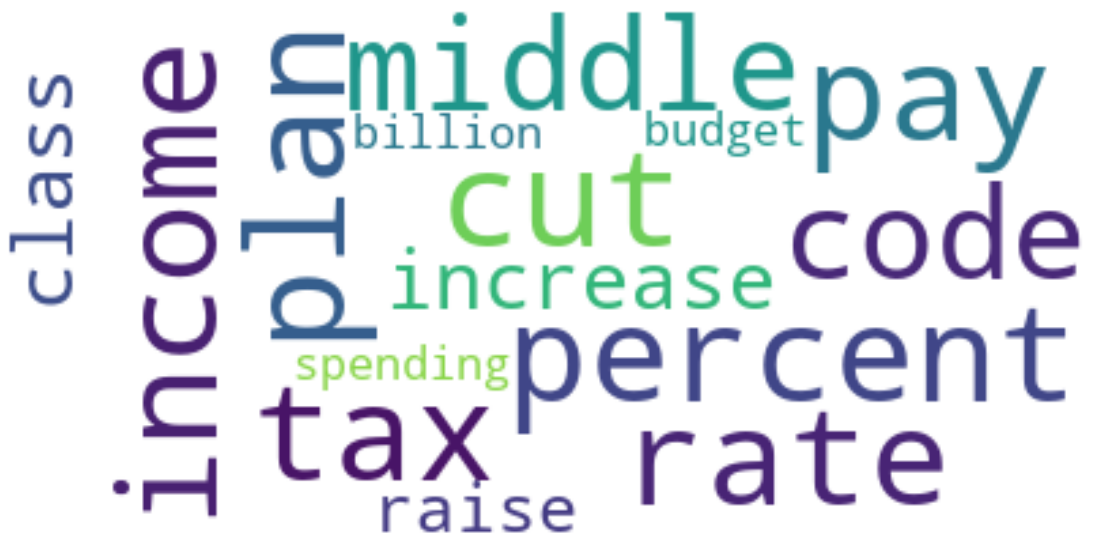

In [575]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(taxes_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 3:

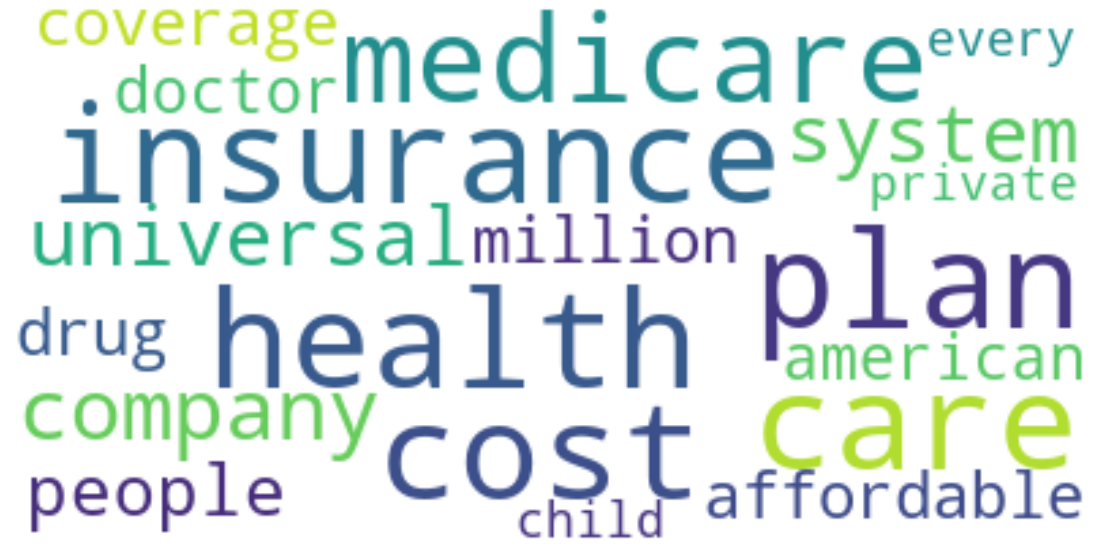

In [576]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(healthcare_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 4:

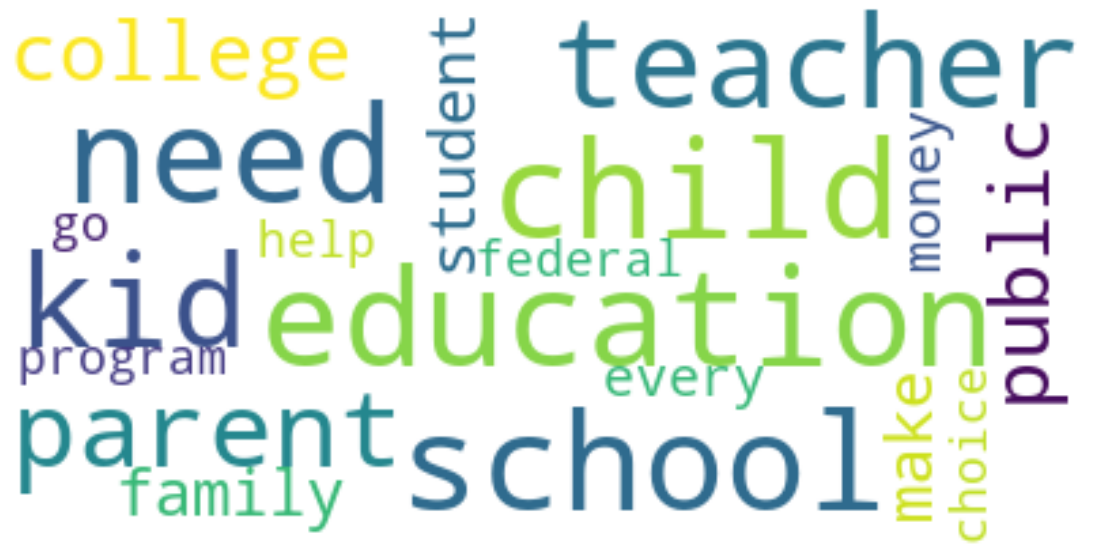

In [577]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(education_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 5:

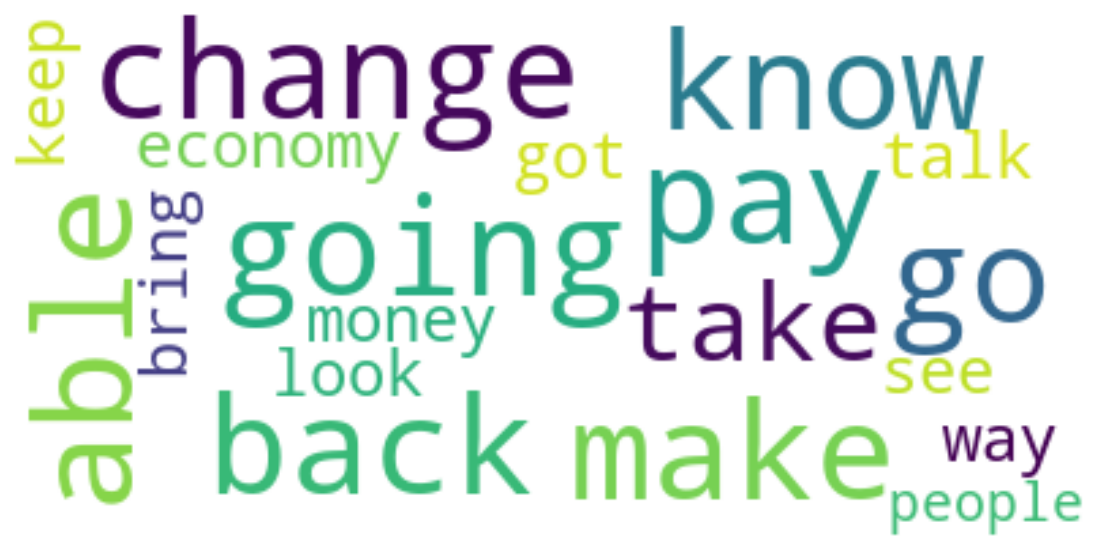

In [578]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(debate_speak_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 6:

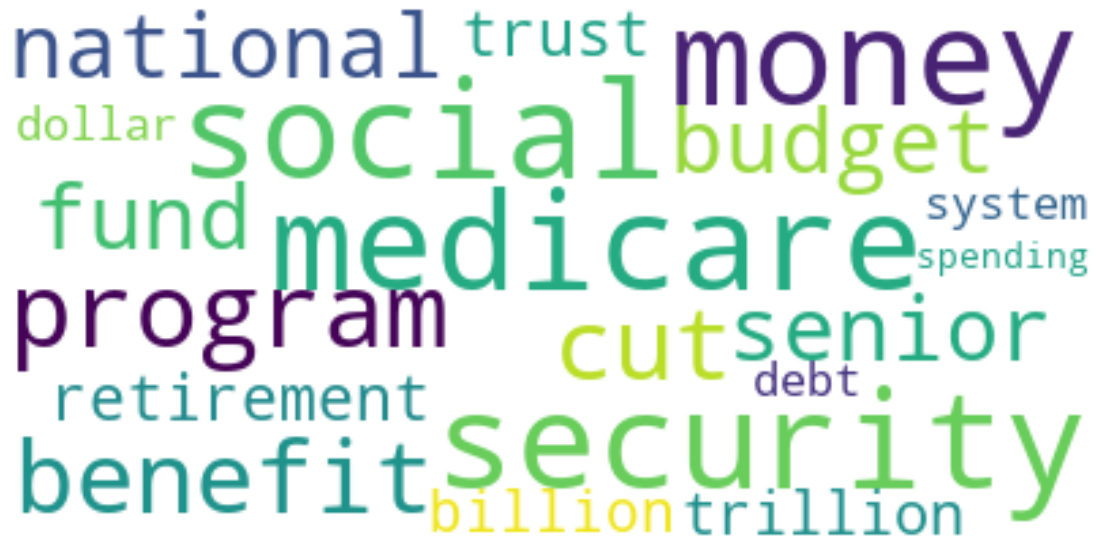

In [579]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(social_security_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 7:

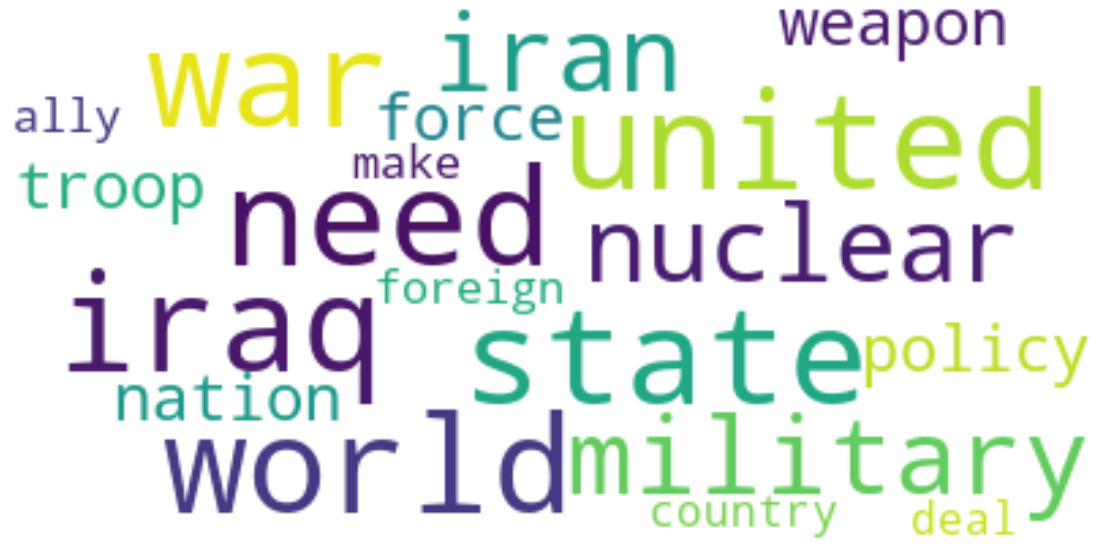

In [580]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(foreign_policy_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 8:

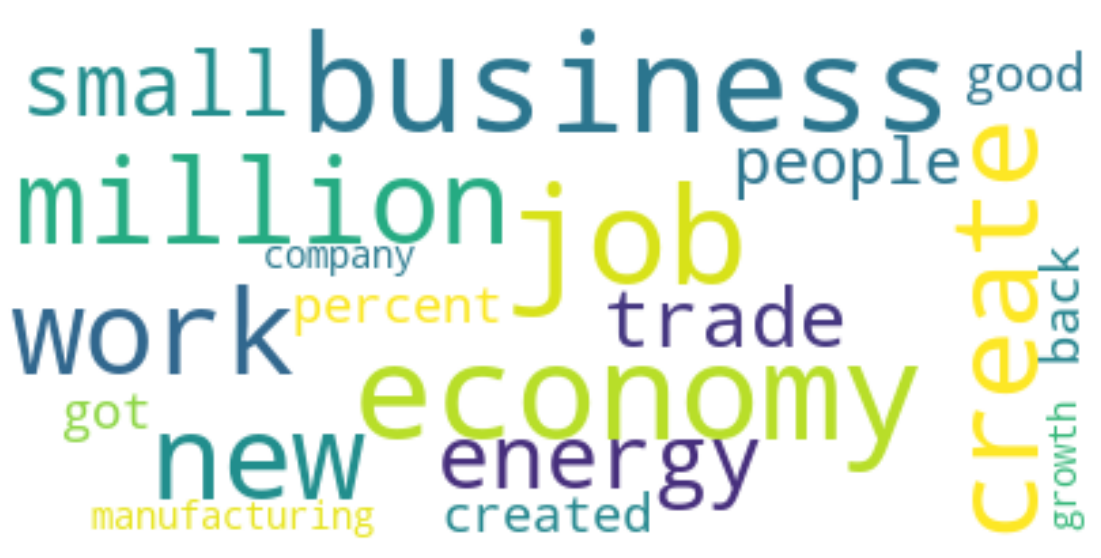

In [581]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(economy_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Topic Assignment Per Document

Here, I'll be adding topics to a document from the NMF document-topic matrix:

Pulling the document-topic matrix:

In [582]:
tf_doc_topic

array([[0.03113426, 0.        , 0.        , ..., 0.        , 0.01408763,
        0.        ],
       [0.05175672, 0.002879  , 0.00274073, ..., 0.00764337, 0.        ,
        0.01221791],
       [0.02341345, 0.02148526, 0.        , ..., 0.        , 0.00553274,
        0.01255571],
       ...,
       [0.02607767, 0.00023475, 0.        , ..., 0.        , 0.00228237,
        0.        ],
       [0.03178464, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03089013, 0.        , 0.00171526, ..., 0.        , 0.0070725 ,
        0.        ]])

In [586]:
tf_doc_topic.shape

(15690, 8)

Mapping these out onto the individual documents;

In [587]:
topic_df = new_df[new_df.line_length >= 25].copy()

In [588]:
topic_df['Campaign_Issues'] = 0
topic_df['Taxes'] = 0
topic_df['Healthcare'] = 0
topic_df['Education'] = 0
topic_df['Debate_Speak'] = 0
topic_df['Social_Security'] = 0
topic_df['Foreign_Policy'] = 0
topic_df['Domestic_Economy'] = 0

In [589]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15690 entries, 0 to 76445
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Debate_Name       15690 non-null  object
 1   Transcript        15690 non-null  object
 2   Speaker           15690 non-null  object
 3   Data_Source       15690 non-null  object
 4   Debate_Type       15690 non-null  object
 5   Year              15690 non-null  int64 
 6   Speaker_Type      15690 non-null  object
 7   line_length       15690 non-null  int64 
 8   Election_Result   15690 non-null  object
 9   string            15690 non-null  object
 10  Campaign_Issues   15690 non-null  int64 
 11  Taxes             15690 non-null  int64 
 12  Healthcare        15690 non-null  int64 
 13  Education         15690 non-null  int64 
 14  Debate_Speak      15690 non-null  int64 
 15  Social_Security   15690 non-null  int64 
 16  Foreign_Policy    15690 non-null  int64 
 17  Domestic_Eco

In [590]:
for i, text in enumerate(topic_df.string):
    topic_df.iloc[i, 10] = tf_doc_topic[i][0]
    topic_df.iloc[i, 11] = tf_doc_topic[i][1]
    topic_df.iloc[i, 12] = tf_doc_topic[i][2]
    topic_df.iloc[i, 13] = tf_doc_topic[i][3]
    topic_df.iloc[i, 14] = tf_doc_topic[i][4]
    topic_df.iloc[i, 15] = tf_doc_topic[i][5]
    topic_df.iloc[i, 16] = tf_doc_topic[i][6]
    topic_df.iloc[i, 17] = tf_doc_topic[i][7]

In [592]:
topic_df.to_csv('./Data/full_set_topic_data.csv', index=False)

### EDA Using Topics:

**Note, the below is NOT my final topics.  This was from an earlier iteration in the project lifecycle.  Final model visualizations were done in Tableau using the full_set_topic_data.csv file above.  Visualizations are housed in the Final Presentation folder.**

Based on topic modelling above, here are the 5 topics (based on the top words):
1. War/Foreign Policy
2. Economy/Taxes
3. Healthcare
4. Education
5. Random Bucket - Campaign Speech

In [43]:
topics = ['Random_Campaign_Speak','Economy/Taxes', 'Healthcare', 'Rights/Laws','Education','War-Foreign_Policy']

In [44]:
types = ['Democrat', 'Republican', 'Moderator/Other'] 

In [45]:
topics_over_time = topic_df.groupby([topic_df.Year, topic_df.Speaker_Type]).agg({'Topic_1':'mean','Topic_2':'mean', 'Topic_3':'mean', 'Topic_4':'mean', 'Topic_5':'mean', 'Topic_6':'mean'}).reset_index()

In [46]:
topics_over_time.head()

,Year,Speaker_Type,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,1960,Democrat,0.013982,0.007388,0.003742,0.031409,0.012048,0.040276
1,1960,Moderator/Other,0.008950,0.002384,0.000872,0.028712,0.008409,0.022319
2,1960,Republican,0.019694,0.008053,0.004211,0.036281,0.012024,0.038869
3,1976,Democrat,0.021119,0.022078,0.005077,0.035027,0.009797,0.025286
4,1976,Moderator/Other,0.011373,0.008193,0.001764,0.028499,0.006207,0.013906


In [47]:
topics_over_time.shape

(53, 8)

Topics Concentration, by Speaker Type:

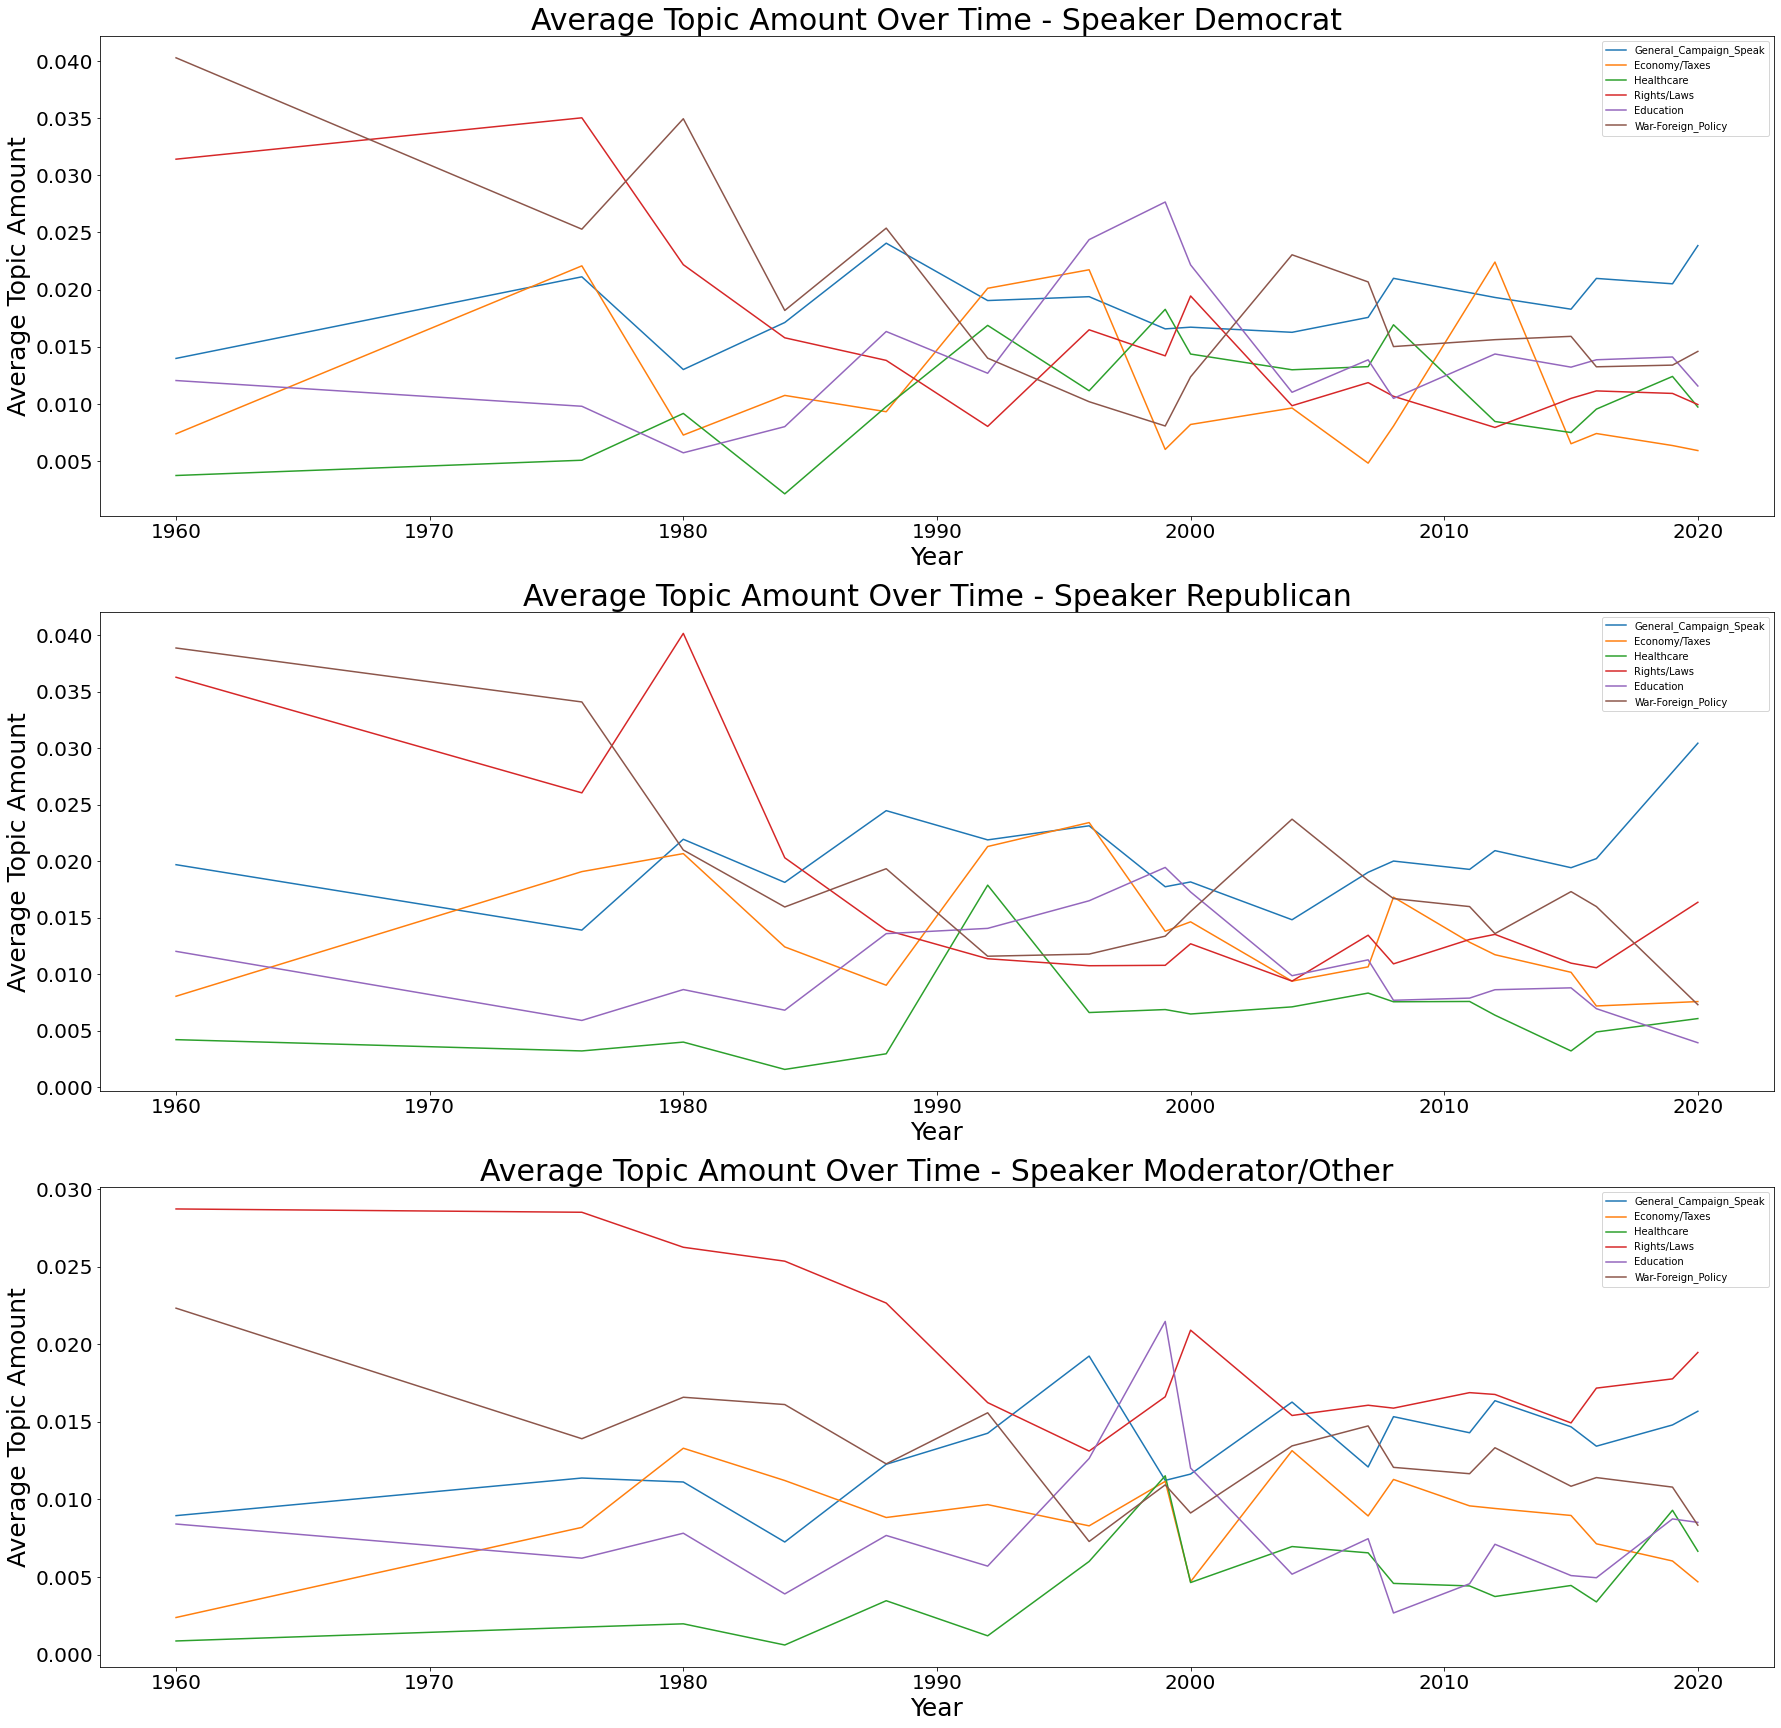

In [48]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, speaker_type in enumerate(types, 1):
    plt.subplot(3,1,i)
    counter = 2
    for topic in topics:
        legend.append(topic)
        x = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, 0]
        y = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, counter]
        legend.append(topic)
        plt.plot(x,y)
        counter += 1
    plt.xlabel('Year', size=25)
    plt.ylabel('Average Topic Amount', size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average Topic Amount Over Time - Speaker {}'.format(speaker_type), size=30)
    plt.legend(('General_Campaign_Speak','Economy/Taxes', 'Healthcare', 'Rights/Laws','Education','War-Foreign_Policy'))

# NMF TOPIC MODELING ON INDIVIDUAL PARTY PRIMARIES:

I'd like to see if different, more specific topics emerge from Republican and Democrat primaries.  These are where the candidates are debating amongst their party with the goal of showing why they are a better choice against the other party, so my thought is you will see more specific words related to each party here, that don't show up in the general election debates.  This can be used for insight on how the parties have changed over the last 20 years.

In [593]:
stop

['republican',
 'america',
 'applause',
 'cheers',
 'presidential',
 'vice',
 'evening',
 'debate',
 'candidate',
 'campaign',
 'minute',
 'think',
 'would',
 'sure',
 'get',
 'say',
 'year']

# Republican Primaries:

In [594]:
#Adding a way to add additional stop words to the republican primaries, if needed:
gop_stop = stop + ['america', 'republican', 'issue']

In [595]:
gop_vectorizer = TfidfVectorizer(stop_words=gop_stop)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [597]:
X = new_df[(new_df.line_length >= 25) & (new_df.Debate_Type =='Primary-Republican') & ((new_df.Speaker_Type =='Republican'))]['string']
tfi_model = gop_vectorizer.fit_transform(X)

In [598]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=gop_vectorizer.get_feature_names())

In [599]:
tf_term_document_matrix.shape

(5465, 10405)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [602]:
gop_nmf_model = NMF(8, init='nndsvda')

Topics from the relating model, for each line:

In [603]:
gop_doc_topic = gop_nmf_model.fit_transform(tf_term_document_matrix)
gop_doc_topic.shape

(5465, 8)

Pulling the top 20 words for each of the k topics:

In [604]:
tf_words = gop_vectorizer.get_feature_names()
tf = gop_nmf_model.components_.argsort(axis=1)[:,-1:-21:-1]
gop_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(gop_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['state', 'united', 'war', 'world', 'iran', 'military', 'nuclear', 'one', 'policy', 'take', 'weapon', 'iraq', 'foreign', 'nation', 'like', 'make', 'china', 'israel', 'trade', 'interest']


Topic 2:
['tax', 'cut', 'percent', 'income', 'plan', 'rate', 'code', 'pay', 'flat', 'spending', 'corporate', 'money', 'capital', 'rid', 'gain', 'raise', 'budget', 'lower', 'middle', 'fair']


Topic 3:
['health', 'care', 'insurance', 'cost', 'saving', 'plan', 'account', 'system', 'buy', 'medicare', 'market', 'medical', 'people', 'federal', 'patient', 'program', 'percent', 'take', 'money', 'medicaid']


Topic 4:
['life', 'school', 'child', 'right', 'pro', 'believe', 'parent', 'education', 'choice', 'law', 'court', 'family', 'make', 'every', 'decision', 'respect', 'human', 'god', 'abortion', 'federal']


Topic 5:
['job', 'economy', 'business', 'create', 'work', 'created', 'million', 'sector', 'energy', 'back', 'regulation', 'world', 'private', 'manufacturing', 'trade', 'make', 'small', 'china',

In [605]:
tf.shape

(8, 20)

Based on the above, the 8 categories that seem to emerge are:

1. Foreign Policy/Military
2. Taxes
3. Healthcare
4. School/Religion
5. Domestic Economy
6. Social Security
7. Immigration
8. Debate_Speak

Adding topic assignments to a new dataframe, to export and work with in Tableau:

In [606]:
foreign_policy_topic = ' '.join(gop_topic_words[0])
taxes_topic = ' '.join(gop_topic_words[1])
healthcare_topic = ' '.join(gop_topic_words[2])
school_relgion_topic = ' '.join(gop_topic_words[3])
domestic_economy_topic = ' '.join(gop_topic_words[4])
social_security_topic = ' '.join(gop_topic_words[5])
immigration_topic = ' '.join(gop_topic_words[6])
debate_speak_topic = ' '.join(gop_topic_words[7])

Mapping these out onto the individual documents;

In [607]:
gop_topic_df = new_df[(new_df.line_length >= 25) & (new_df.Debate_Type =='Primary-Republican') & ((new_df.Speaker_Type =='Republican'))].copy()

In [608]:
gop_topic_df['Foreign_Policy'] = 0
gop_topic_df['Taxes'] = 0
gop_topic_df['Healthcare'] = 0
gop_topic_df['School_Religion'] = 0
gop_topic_df['Domestic_Economy'] = 0
gop_topic_df['Social_Security'] = 0
gop_topic_df['Immigration'] = 0
gop_topic_df['Debate_Speak'] = 0

In [609]:
gop_topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 19124 to 73522
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Debate_Name       5465 non-null   object
 1   Transcript        5465 non-null   object
 2   Speaker           5465 non-null   object
 3   Data_Source       5465 non-null   object
 4   Debate_Type       5465 non-null   object
 5   Year              5465 non-null   int64 
 6   Speaker_Type      5465 non-null   object
 7   line_length       5465 non-null   int64 
 8   Election_Result   5465 non-null   object
 9   string            5465 non-null   object
 10  Foreign_Policy    5465 non-null   int64 
 11  Taxes             5465 non-null   int64 
 12  Healthcare        5465 non-null   int64 
 13  School_Religion   5465 non-null   int64 
 14  Domestic_Economy  5465 non-null   int64 
 15  Social_Security   5465 non-null   int64 
 16  Immigration       5465 non-null   int64 
 17  Debate_Sp

In [613]:
for i, text in enumerate(gop_topic_df.string):
    gop_topic_df.iloc[i, 10] = gop_doc_topic[i][0]
    gop_topic_df.iloc[i, 11] = gop_doc_topic[i][1]
    gop_topic_df.iloc[i, 12] = gop_doc_topic[i][2]
    gop_topic_df.iloc[i, 13] = gop_doc_topic[i][3]
    gop_topic_df.iloc[i, 14] = gop_doc_topic[i][4]
    gop_topic_df.iloc[i, 15] = gop_doc_topic[i][5]
    gop_topic_df.iloc[i, 16] = gop_doc_topic[i][6]
    gop_topic_df.iloc[i, 17] = gop_doc_topic[i][7]

In [614]:
gop_topic_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string,Foreign_Policy,Taxes,Healthcare,School_Religion,Domestic_Economy,Social_Security,Immigration,Debate_Speak
19124,"Republican Candidates Debate in Miami, Florida","KASICH: Well, thank you. You know, I look in t...",kasich,American Presidency Project,Primary-Republican,2016,Republican,34,Loser,well thank know look face people across know h...,0.023461,0.002375,0.000000,0.011499,0.000000,0.005123,0.001556,0.082711
19129,"Republican Candidates Debate in Miami, Florida","For over two centuries, America has been an ex...",rubio,American Presidency Project,Primary-Republican,2016,Republican,27,Loser,two century america exceptional nation time co...,0.008252,0.000000,0.000000,0.078664,0.004748,0.089947,0.002030,0.009536
19132,"Republican Candidates Debate in Miami, Florida","This election, this debate is not about insult...",cruz,American Presidency Project,Primary-Republican,2016,Republican,25,Loser,election debate insult attack individual stage...,0.001373,0.000337,0.000904,0.055435,0.000000,0.017571,0.000000,0.028814
19134,"Republican Candidates Debate in Miami, Florida",TRUMP: One of the biggest political events any...,trump,American Presidency Project,Primary-Republican,2016,Republican,32,Winner,one biggest political event anywhere world hap...,0.005856,0.000000,0.000000,0.006769,0.007797,0.023854,0.000000,0.057503
19141,"Republican Candidates Debate in Miami, Florida",But my position has always been we want to hav...,kasich,American Presidency Project,Primary-Republican,2016,Republican,28,Loser,position always free trade fair trade arguing ...,0.015961,0.000000,0.000000,0.014106,0.034848,0.005802,0.000485,0.039156


In [615]:
gop_topic_df.to_csv('./Data/gop_topic_data.csv', index=False)

The above was used to create visualizations in Tableau, looking at average topic-document values over time.  Some key visualizations are in the Final Presentation Folder.

# Democrat Primaries:

In [616]:
dem_stop = stop + ['america', 'democrat', 'issue']

In [617]:
dem_vectorizer = TfidfVectorizer(stop_words=dem_stop)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [618]:
X = new_df[(new_df.line_length >= 25) & (new_df.Debate_Type =='Primary-Democrat')&(new_df.Speaker_Type =='Democrat')]['string']
tfi_model = dem_vectorizer.fit_transform(X)

In [619]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=dem_vectorizer.get_feature_names())

In [620]:
tf_term_document_matrix.shape

(4679, 9579)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [621]:
dem_nmf_model = NMF(8, init='nndsvda')

Topics from the relating model, for each line:

In [622]:
dem_doc_topic = dem_nmf_model.fit_transform(tf_term_document_matrix)
dem_doc_topic.shape

(4679, 8)

Pulling the top 20 words for each of the k topics:

In [623]:
dem_words = dem_vectorizer.get_feature_names()
tf = dem_nmf_model.components_.argsort(axis=1)[:,-1:-21:-1]
dem_topic_words = [[dem_words[e] for e in l] for l in tf]
for i, words in enumerate(dem_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['people', 'know', 'one', 'state', 'right', 'united', 'time', 'well', 'like', 'gun', 'thing', 'woman', 'done', 'bill', 'come', 'fact', 'got', 'look', 'number', 'let']


Topic 2:
['health', 'care', 'plan', 'universal', 'insurance', 'affordable', 'coverage', 'system', 'medicare', 'child', 'people', 'cost', 'every', 'million', 'single', 'access', 'american', 'provide', 'cover', 'everyone']


Topic 3:
['tax', 'pay', 'percent', 'class', 'middle', 'income', 'wealth', 'family', 'paying', 'dollar', 'cut', 'people', 'money', 'raise', 'million', 'top', 'wealthy', 'rate', 'street', 'working']


Topic 4:
['school', 'education', 'child', 'college', 'kid', 'teacher', 'public', 'every', 'student', 'free', 'go', 'tuition', 'debt', 'make', 'program', 'family', 'community', 'university', 'high', 'young']


Topic 5:
['war', 'iraq', 'troop', 'iran', 'military', 'end', 'voted', 'combat', 'afghanistan', 'world', 'security', 'vote', 'policy', 'nuclear', 'home', 'weapon', 'force', 'foreign', 'united'

In [624]:
tf.shape

(8, 20)

The 8 Topics to emerge are:
1. Campaign_Speak
2. Healthcare_Coverage
3. Taxes
4. Education
5. War/Foreign Policy
6. Progressive_Change
7. Trade / Energy
8. Healthcare_System

Adding topic assignments to a new dataframe, to export and work with in Tableau:

In [625]:
campaign_speak_topic = ' '.join(dem_topic_words[0])
healthcare_coverage_topic = ' '.join(dem_topic_words[1])
taxes_topic = ' '.join(dem_topic_words[2])
education_topic = ' '.join(dem_topic_words[3])
foreign_policy_topic = ' '.join(dem_topic_words[4])
progressive_change_topic = ' '.join(dem_topic_words[5])
economy_energy_topic = ' '.join(dem_topic_words[6])
healthcare_system_topic = ' '.join(dem_topic_words[7])

Mapping these out onto the individual documents;

In [626]:
dem_topic_df = new_df[(new_df.line_length >= 25) & (new_df.Debate_Type =='Primary-Democrat') & ((new_df.Speaker_Type =='Democrat'))].copy()

In [627]:
dem_topic_df['Campaign_Speak'] = 0
dem_topic_df['Healthcare_Coverage'] = 0
dem_topic_df['Taxes'] = 0
dem_topic_df['Education'] = 0
dem_topic_df['War_Foreign_Policy'] = 0
dem_topic_df['Progressive_Change'] = 0
dem_topic_df['Economy_Climate'] = 0
dem_topic_df['Healthcare_system'] = 0

In [628]:
dem_topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4679 entries, 2753 to 68530
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Debate_Name          4679 non-null   object
 1   Transcript           4679 non-null   object
 2   Speaker              4679 non-null   object
 3   Data_Source          4679 non-null   object
 4   Debate_Type          4679 non-null   object
 5   Year                 4679 non-null   int64 
 6   Speaker_Type         4679 non-null   object
 7   line_length          4679 non-null   int64 
 8   Election_Result      4679 non-null   object
 9   string               4679 non-null   object
 10  Campaign_Speak       4679 non-null   int64 
 11  Healthcare_Coverage  4679 non-null   int64 
 12  Taxes                4679 non-null   int64 
 13  Education            4679 non-null   int64 
 14  War_Foreign_Policy   4679 non-null   int64 
 15  Progressive_Change   4679 non-null   int64 
 16  Ec

In [629]:
for i, text in enumerate(dem_topic_df.string):
    dem_topic_df.iloc[i, 10] = dem_doc_topic[i][0]
    dem_topic_df.iloc[i, 11] = dem_doc_topic[i][1]
    dem_topic_df.iloc[i, 12] = dem_doc_topic[i][2]
    dem_topic_df.iloc[i, 13] = dem_doc_topic[i][3]
    dem_topic_df.iloc[i, 14] = dem_doc_topic[i][4]
    dem_topic_df.iloc[i, 15] = dem_doc_topic[i][5]
    dem_topic_df.iloc[i, 16] = dem_doc_topic[i][6]
    dem_topic_df.iloc[i, 17] = dem_doc_topic[i][7]

In [630]:
dem_topic_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string,Campaign_Speak,Healthcare_Coverage,Taxes,Education,War_Foreign_Policy,Progressive_Change,Economy_Climate,Healthcare_system
2753,"Democratic Candidates Debate in Washington, DC",But there are three pieces to this. First of a...,biden,American Presidency Project,Primary-Democrat,2020,Democrat,36,Winner,three piece first take care fact exposed likel...,0.018379,0.048569,0.000000,0.000000,0.009048,0.000000,0.012282,0.001762
2754,"Democratic Candidates Debate in Washington, DC","Secondly, I would make sure that every state i...",biden,American Presidency Project,Primary-Democrat,2020,Democrat,35,Winner,secondly would make sure every union least pla...,0.000000,0.012367,0.000000,0.012592,0.003923,0.000310,0.074374,0.005277
2755,"Democratic Candidates Debate in Washington, DC",But we have to deal with the economic fallout ...,biden,American Presidency Project,Primary-Democrat,2020,Democrat,25,Winner,deal economic fallout quickly mean making sure...,0.005580,0.000277,0.075657,0.022723,0.000000,0.017455,0.029738,0.011190
2759,"Democratic Candidates Debate in Washington, DC","Second of all, what we need to do -- and I'm g...",sanders,American Presidency Project,Primary-Democrat,2020,Democrat,28,Loser,second need glad called national emergency got...,0.009436,0.000000,0.003784,0.023743,0.000000,0.002898,0.046434,0.027151
2763,"Democratic Candidates Debate in Washington, DC",So we need unprecedented action right now to d...,sanders,American Presidency Project,Primary-Democrat,2020,Democrat,32,Loser,need unprecedented action right deal unprecede...,0.008252,0.009221,0.032386,0.000000,0.000000,0.040141,0.094151,0.001075


In [631]:
dem_topic_df.to_csv('./Data/dem_topic_data.csv', index=False)

The above was used to create visualizations in Tableau, looking at average topic-document values over time.  Some key visualizations are in the Final Presentation Folder.